<a href="https://colab.research.google.com/github/paaaaat/programming-project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing a Covid-19 related dataset.**

The topic of this analysis is to find some features that may be correlated to the cases and deaths caused by the Covid-19 disease.

The dataset of this analysis comes from the [Github repository](https://github.com/owid/covid-19-data/tree/master/public/data/) of Our World In data.

## Data Exploration and Wrangling.

In [693]:
import numpy as np
import pandas as pd

In [694]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
owid = pd.read_csv(url)
# owid stands for Our World In Data

In [695]:
print(owid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162372 entries, 0 to 162371
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    162372 non-null  object 
 1   continent                                   152637 non-null  object 
 2   location                                    162372 non-null  object 
 3   date                                        162372 non-null  object 
 4   total_cases                                 159414 non-null  float64
 5   new_cases                                   159378 non-null  float64
 6   new_cases_smoothed                          158227 non-null  float64
 7   total_deaths                                141727 non-null  float64
 8   new_deaths                                  141908 non-null  float64
 9   new_deaths_smoothed                         141778 non-null  float64
 

The numerous features are explained in the [Github repository](https://github.com/owid/covid-19-data/tree/master/public/data/).




In [696]:
print(owid.shape)

(162372, 67)


Before we deep dive into data exploration we absolutely have to clean up the dataset, as it misses quite many values.

First let's drop some columns: it's reasonable to say that columns < 100 000 values cannot be representative (by 12/02/2021 there are more than 160 000 rows).

First of all let's find the `columns.count() < 100 000`

In [697]:
cols_to_remove = owid[[column for column in owid.columns if owid[column].count() < 100000]]

In [698]:
owid.drop(cols_to_remove, axis=1, inplace=True)

In [699]:
owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162372 entries, 0 to 162371
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   iso_code                         162372 non-null  object 
 1   continent                        152637 non-null  object 
 2   location                         162372 non-null  object 
 3   date                             162372 non-null  object 
 4   total_cases                      159414 non-null  float64
 5   new_cases                        159378 non-null  float64
 6   new_cases_smoothed               158227 non-null  float64
 7   total_deaths                     141727 non-null  float64
 8   new_deaths                       141908 non-null  float64
 9   new_deaths_smoothed              141778 non-null  float64
 10  total_cases_per_million          158673 non-null  float64
 11  new_cases_per_million            158637 non-null  float64
 12  ne

In [700]:
owid.drop('iso_code', axis=1, inplace=True)

Strange to read that continent misses some values we can see that `location` for NaN `continents` are either continents themselves, income classification and the World itself.

In [701]:
print(owid[owid['continent'].isnull()]['location'].unique())

['Africa' 'Asia' 'Europe' 'European Union' 'High income' 'International'
 'Low income' 'Lower middle income' 'North America' 'Oceania'
 'South America' 'Upper middle income' 'World']


We can say that their `continent` can be *World*.

In [702]:
owid['continent'].fillna(value='World', inplace=True)

In [703]:
print(str(owid['continent'].count()) + ' true values out of ' + str(len(owid)))

162372 true values out of 162372


From both the `.info()` and github repo we see that the features expressing cases, vaccinations, deaths... are sided by their `smoothed` feature.
The `smoothed` data refers to the correction of the data by means of probabilistic models, especially useful when the data come from third-world countries and war-zones.

We can say that `smoothed` features are more accurate than their counterparts **non-smoothed**.

In [704]:
cols_to_remove = [
    'new_cases',
    'new_deaths',
    'new_cases_per_million',
    'new_deaths_per_million'
    ]

In [705]:
owid.drop(cols_to_remove, axis=1, inplace=True)

Now it's time to replace the NaN values.

In [706]:
owid[owid['total_cases'].isnull()]['location'].unique()

array(['Africa', 'Albania', 'Argentina', 'Bangladesh', 'Cyprus',
       'Denmark', 'Estonia', 'Europe', 'European Union', 'Fiji', 'Greece',
       'Guatemala', 'Guernsey', 'Hungary', 'Israel', 'Jersey', 'Kenya',
       'Latvia', 'Libya', 'Low income', 'Lower middle income',
       'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mexico', 'Morocco',
       'Nauru', 'Niue', 'Northern Cyprus', 'Norway', 'Oceania', 'Panama',
       'Paraguay', 'Pitcairn', 'Portugal', 'Senegal', 'Serbia',
       'Sint Maarten (Dutch part)', 'Slovenia', 'South Africa',
       'South America', 'Sudan', 'Taiwan', 'Thailand', 'Togo', 'Tokelau',
       'Tonga', 'Turkmenistan', 'Tuvalu'], dtype=object)

In [707]:
owid[owid['location'] == 'Albania'].head()

,continent,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
1459,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1460,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1461,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1462,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1463,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.795


In [708]:
owid[owid['location'] == 'Taiwan'].head()

,continent,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
142669,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN
142670,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN
142671,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN
142672,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN
142673,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN


In [709]:
owid[owid['location'] == 'Taiwan'].tail()

,continent,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
143427,Asia,Taiwan,2022-02-12,19515.0,59.143,851.0,0.000,818.067,2.479,35.674,0.000,1.04,NaN,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN
143428,Asia,Taiwan,2022-02-13,19567.0,60.429,851.0,0.000,820.247,2.533,35.674,0.000,1.04,NaN,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN
143429,Asia,Taiwan,2022-02-14,19621.0,61.286,851.0,0.000,822.511,2.569,35.674,0.000,1.04,NaN,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN
143430,Asia,Taiwan,2022-02-15,19666.0,61.000,852.0,0.143,824.397,2.557,35.716,0.006,NaN,NaN,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN
143431,Asia,Taiwan,2022-02-16,19732.0,62.714,852.0,0.143,827.164,2.629,35.716,0.006,NaN,NaN,23855008.0,NaN,42.2,NaN,8.353,NaN,103.957,NaN,NaN,NaN,NaN,80.46,NaN


We note that as far as the values of cases and deaths are concerned, as for example for Taiwan, NaN values come from the first few rows.

These first rows refer to the beginning of the pandemic, so it is reasonable to say that these dates hold zero `new_cases` and zero `new_deaths`, beacause were not even detected by local governments.

Let's fill these rows with 0s.

We fill NaN values for the columns strictly concerning the Covid-19 curve, which are the columns from the beginning unitl `stringency_index`.

In [710]:
index_stringency_index = owid.columns.get_loc('stringency_index')

counter = 0

while counter < index_stringency_index:
  owid.iloc[:, counter].fillna(0, inplace=True)
  counter += 1

Now let's fix the `population` feature.

In [711]:
owid[owid['population'].isnull()]['location'].unique()

array(['International', 'Northern Cyprus'], dtype=object)

In [712]:
owid.loc[owid['location'] == 'International', 'population'] = 7900000000

In [713]:
owid.loc[owid['location'] == 'Northern Cyprus', 'population'] = 326000

In [714]:
str(owid['population'].count()) + ' truthy values out of ' + str(len(owid))

'162372 truthy values out of 162372'

Population_density may be an important features for a diseas like a virus, but there are way too many location with NaN values, so we cannot replace them with zeros nor infere a mean.

Let's drop it.

In [715]:
owid[owid['population_density'].isnull()]['location'].unique()

array(['Africa', 'Anguilla', 'Asia', 'Bonaire Sint Eustatius and Saba',
       'Cook Islands', 'Europe', 'European Union', 'Falkland Islands',
       'Guernsey', 'High income', 'International', 'Jersey', 'Low income',
       'Lower middle income', 'Montserrat', 'Niue', 'North America',
       'Northern Cyprus', 'Oceania', 'Pitcairn', 'Saint Helena',
       'Saint Pierre and Miquelon', 'South America', 'South Sudan',
       'Syria', 'Taiwan', 'Tokelau', 'Upper middle income', 'Vatican',
       'Wallis and Futuna'], dtype=object)

In [716]:
owid.drop('population_density', axis=1, inplace=True)

Many more columns remain with NaN values. These cannot be treated as the first columns, so 0s aren't logically exhaustive.

We see that none of the rows are filled with truthy values, so methods like bfill and ffill are useless.

Indeed a consideration can be made.

For this project, precision in data mining can be not that precious, so
specifically for columns like `handwashing_facilities`, `human_development index` and `stringency_index` (just to name a few), NaN values can be replaced with the mean of the same features, grouped by the location's continent.

So, we define a function that takes the column, creates a list of the means of that column based on the mean for the associated continent finally loops through the list and every row of the dataset and if the the continent matches *AND* the value is NaN, it replaces it with the mean.

`Continents` array can be zipped with `list_of_means` in a correct way because their sorted automatically.

In [717]:
continents = owid['continent'].unique()
continents.sort()

def filling_the_na_values_with_means(column):
  list_of_means = owid.groupby('continent')[column].mean().tolist()
  zipped_list = [(x, y) for x, y in zip(continents, list_of_means)]

  for i in zipped_list:
    for index in owid.index:
      if owid.loc[index, 'continent'] == i[0] and np.isnan(owid.loc[index, column]):
        owid.loc[index, column] = i[1]




# This was the initial attempt to use Pandas powerful methods, but for some
# reasons it didn't work out.
# The working loops may be a bit mechanic and energy-consumptive, because it
# loops every cell of every row of every column, but that's the only way i
# figured out the filling.

# for i in zipped_list:
#   owid.loc[owid['continent'] == i[0], column].fillna(i[1], inplace=True)

Let's check the sorted arrays of `continents` and `list_of_means`, and if they are correctly paired into `zipped_list`.

In [718]:
owid.groupby('continent')['gdp_per_capita'].mean()

continent
Africa            5481.010020
Asia             24934.550679
Europe           33462.010431
North America    20914.920550
Oceania          13382.785012
South America    13891.045555
World            15469.207000
Name: gdp_per_capita, dtype: float64

In [719]:
check_list_of_means = owid.groupby('continent')['gdp_per_capita'].mean().tolist()
check_zipped_list = [(x, y) for x, y in zip(continents, list_of_means)]
check_zipped_list

[('Africa', 6006.421983650645),
 ('Asia', 23917.391167488793),
 ('Europe', 33378.51107608306),
 ('North America', 19145.485003161757),
 ('Oceania', 12173.43517647059),
 ('South America', 13844.651427292865)]

They are correctly paired.

Now let's fill the NaN values with the average values of each country's continent.

In [720]:
for column in owid.columns[index_stringency_index:]:
  filling_the_na_values_with_means(column)

To avoid dispersive analysis, we shall combine `male_smokers` and `female_smokers` into `smokers_pop`, which stands for *smokers population*.

In [721]:
owid['smokers_pop'] = owid['female_smokers'] + owid['male_smokers']

In [722]:
owid.drop(['female_smokers', 'male_smokers'], axis=1, inplace=True)

Finally, as we're not doing a time series analysis, we can drop the values from the features that show daily cases and deaths, and keep the rows of each country at their maximum `total_cases` and `total_deaths`, because we want to analyize the relationships and not the ongoing daily situation.

Doing so, we can also drop the `date` feature.

In [723]:
owid.drop(labels=[x for x in owid.columns if 'new' in x], axis=1, inplace=True)

In [724]:
owid = owid.groupby('location')[owid.columns].max()

In [725]:
owid.reset_index(drop=True, inplace=True)

In [726]:
owid.drop(labels='date', axis=1, inplace=True)

In [727]:
owid.sort_values(['continent', 'location'], ignore_index=True, inplace=True)

## Data Visualization.

In [728]:
import matplotlib.pyplot as plt
import seaborn as sns

We start by visualizing the correlation between the two main features: `total_cases` and `total_deaths`.

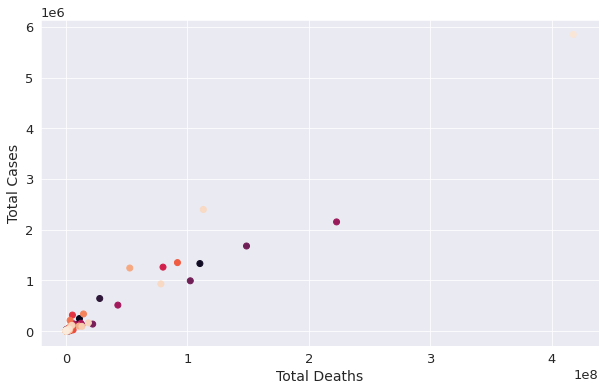

In [729]:
plt.figure(figsize=(10, 6))
plt.xlabel('Total Deaths')
plt.ylabel('Total Cases')

plt.scatter(
    owid.groupby('location')['total_cases'].max(),
    owid.groupby('location')['total_deaths'].max(),
    c=[range(owid['location'].count())])

plt.show()

We se the linear regression between the two features: logically, more cases mean more deaths.

But we also see the outliers, that may come from countrys which had a tremendous amount of cases and deaths.

What we can do is analyzing the features that are in relation to population, like `total_deaths_per_million` and `total_cases_per_million`, and see if they converge.

In [730]:
owid['location'].count()

238

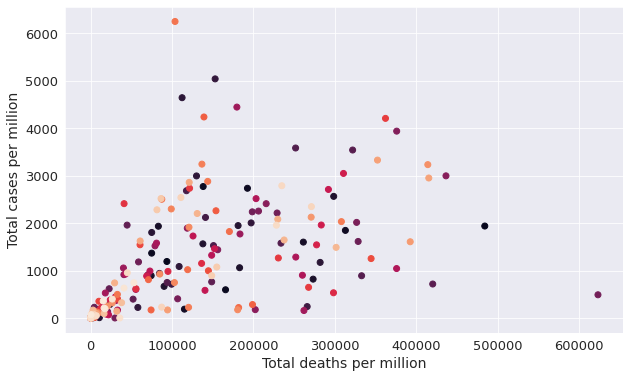

In [731]:
plt.figure(figsize=(10, 6))
plt.xlabel('Total deaths per million')
plt.ylabel('Total cases per million')

plt.scatter(
    owid.groupby('location')['total_cases_per_million'].max(),
    owid.groupby('location')['total_deaths_per_million'].max(),
    c=[range(owid['location'].count())]
    )

plt.show()

In [732]:
owid.nlargest(1, 'total_cases') == owid.nlargest(1, 'total_deaths')

,continent,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,reproduction_rate,stringency_index,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,smokers_pop
237,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True


In [733]:
owid.iloc[214]

continent                     South America
location                             Brazil
total_cases                      27819996.0
total_deaths                       641096.0
total_cases_per_million          130003.966
total_deaths_per_million           2995.868
reproduction_rate                      3.05
stringency_index                      81.02
population                      213993441.0
median_age                             33.5
aged_65_older                         8.552
aged_70_older                          5.06
gdp_per_capita                    14103.452
cardiovasc_death_rate               177.961
diabetes_prevalence                    8.11
hospital_beds_per_thousand              2.2
life_expectancy                       75.88
human_development_index               0.765
smokers_pop                            28.0
Name: 214, dtype: object

The USA seems to be the world's first country for `total cases` and `total deaths`.

To avoid a large number of outliers, we can store the rows which have `location == 'World'`, and maybe have a separate analysis.

In [734]:
macro_owid = owid[owid['continent'] == 'World']

In [735]:
owid.drop(owid[owid['continent'] == 'World'].index, inplace=True)

In [736]:
sns.set_style('darkgrid')
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)

Let's see if we can find some correlations to work on.

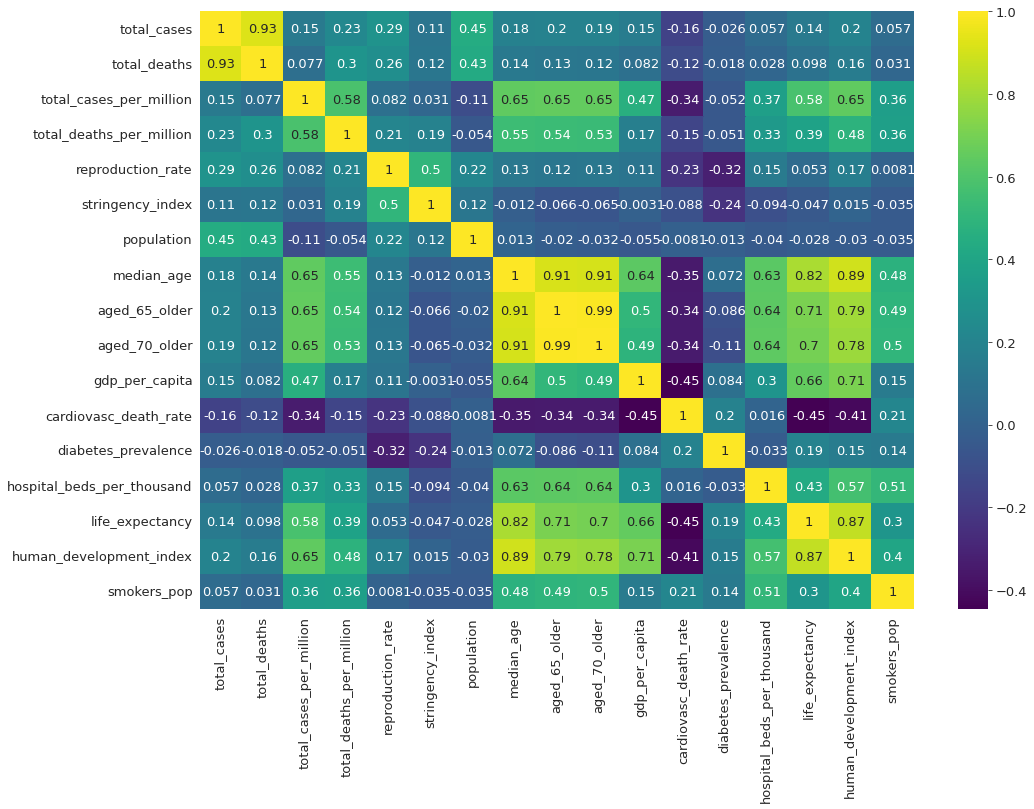

In [737]:
plt.figure(figsize=(16, 11))
sns.heatmap(owid.corr(), annot=True, cmap='viridis')
plt.show()

Seems that nice insights can be derived from:
*   `total_cases_per_million`
*   `total_deaths_per_million`
*   `median_age`
*   `reproduction_rate`
*   `stringency_index`
*   `life_expectancy`
*   `human_development_index`


Let's bring them together.

Other good features correlations (e.g. `human_development_index` + `median_age`) are not taken in consideration as the focus of the analysis is converging over Covid-19 disease.

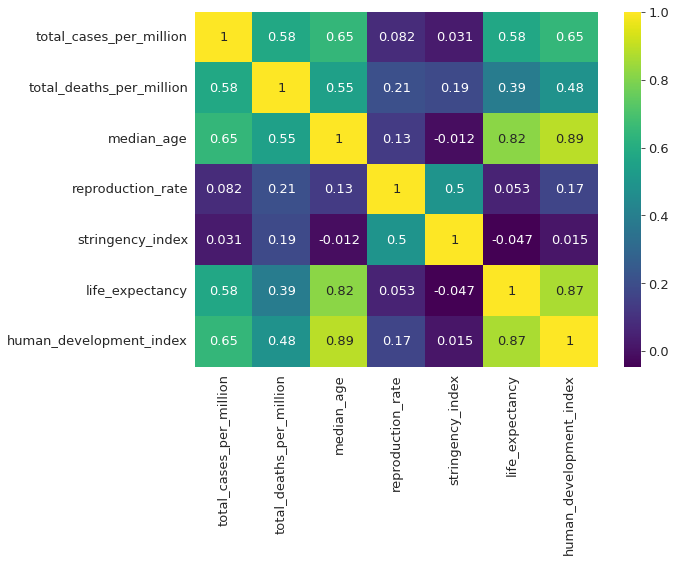

In [738]:
possible_insights = owid[['continent', 'total_cases_per_million', 'total_deaths_per_million', 'median_age', 'reproduction_rate', 'stringency_index', 'life_expectancy', 'human_development_index']]
plt.figure(figsize=(10, 8), tight_layout=True)
sns.heatmap(possible_insights.corr(), annot=True, cmap='viridis')
plt.show()

Let's visualize the major correlations, which are:

1.   `total_deaths_per_million` vs `median_age`
2.   `total_cases_per_million` vs `human_development_index`



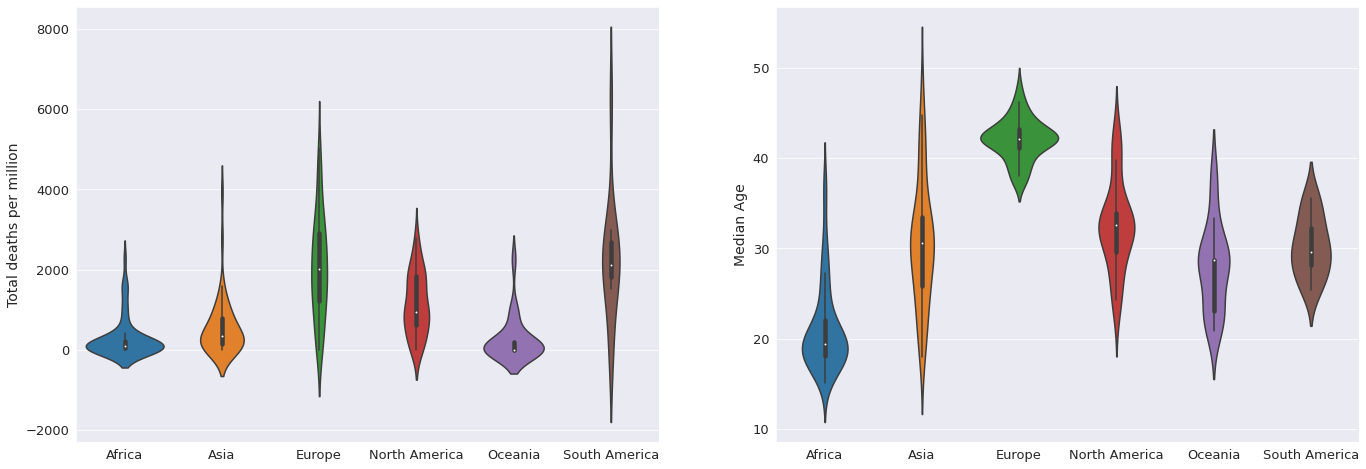

In [739]:
plt.figure(figsize=(23, 8))

plt.subplot(1, 2, 1)
sns.violinplot(data=possible_insights, y='total_deaths_per_million', x='continent')
plt.xlabel('')
plt.ylabel('Total deaths per million')

plt.subplot(1, 2, 2)
sns.violinplot(data=possible_insights, y='median_age', x='continent')
plt.xlabel('')
plt.ylabel('Median Age')

plt.show()

The median of the two visualizations do not coincide: we can see that, for example, *South America* has not the second largest median in `median_age`, but affirmatevly in `total_deaths_per_million`.

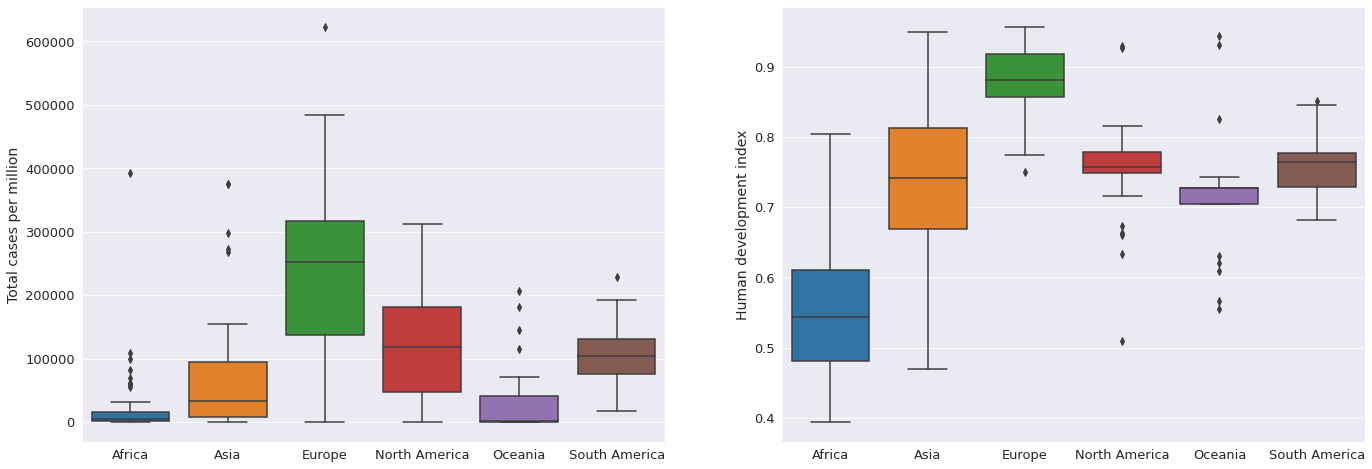

In [740]:
plt.figure(figsize=(23, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=possible_insights, y='total_cases_per_million', x='continent')
plt.xlabel('')
plt.ylabel('Total cases per million')

plt.subplot(1, 2, 2)
sns.boxplot(data=possible_insights, y='human_development_index', x='continent')
plt.xlabel('')
plt.ylabel('Human development index')

plt.show()

The second showing, unlike the first one, shows a quite good correlation between `total_cases_per_million` and `human_development_index`, maybe showing that countries and continents with more wellness, and consequently more logistics and dynamism in the society, corresponds to a higher degree of contagion.

## Linear Regression

We shall now try to teach a model to predict the number of deaths based on the number of cases.

In [741]:
from sklearn.linear_model import LinearRegression

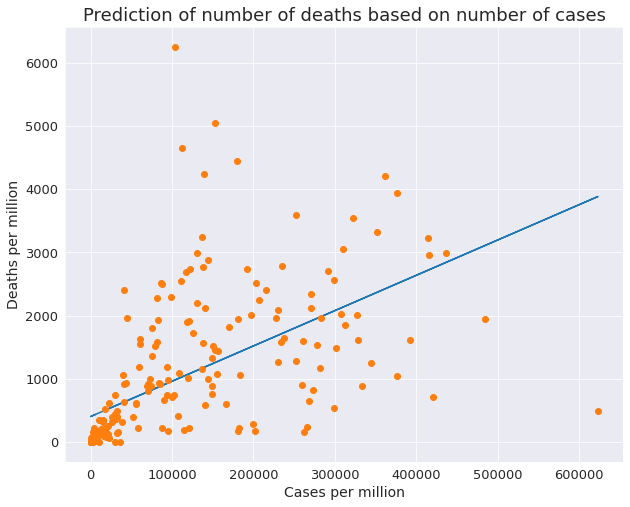

In [780]:
total_cases_per_million = np.array(owid['total_cases_per_million'])
total_cases_per_million = total_cases_per_million.reshape(-1, 1)

total_deaths_per_million = np.array(owid['total_deaths_per_million'])
total_deaths_per_million = total_deaths_per_million.reshape(-1, 1)

line_fitter = LinearRegression()
line_fitter.fit(total_cases_per_million, total_deaths_per_million)
total_deaths_per_million_predict = line_fitter.predict(total_cases_per_million)

plt.figure(figsize=(10, 8))
plt.title('Prediction of number of deaths based on number of cases')
plt.plot(total_cases_per_million, total_deaths_per_million_predict)
plt.plot(total_cases_per_million, total_deaths_per_million, 'o')
plt.xlabel('Cases per million')
plt.ylabel('Deaths per million')
plt.show()

Our prediction based on the number of cases.

<br/>
<hr>
<br/>

## Multiple Linear Regression

This model tries to predict the number of cases/deaths based on some indipendent variables, which are those we found a good correlation.

In [782]:
possible_insights.columns

Index(['continent', 'total_cases_per_million', 'total_deaths_per_million',
       'median_age', 'reproduction_rate', 'stringency_index',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [792]:
from sklearn.model_selection import train_test_split

In [793]:
x = owid[['median_age', 'reproduction_rate', 'stringency_index', 'life_expectancy', 'human_development_index']]

In [794]:
y = owid['total_deaths_per_million']

In [795]:
z = owid['total_cases_per_million']

In [796]:
# First test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [797]:
# Second test
x_2_train, x_2_test, z_train, z_test = train_test_split(x, z, train_size=0.8, test_size=0.2)

In [798]:
mlr = LinearRegression()
mlr_2 = LinearRegression()

In [799]:
# First fit
mlr_model = mlr.fit(x_train, y_train)

In [800]:
# Second fit
mlr_model_2 = mlr_2.fit(x_2_train, z_train)

In [801]:
y_predict = mlr_model.predict(x_test)
z_predict = mlr_model_2.predict(x_2_test)

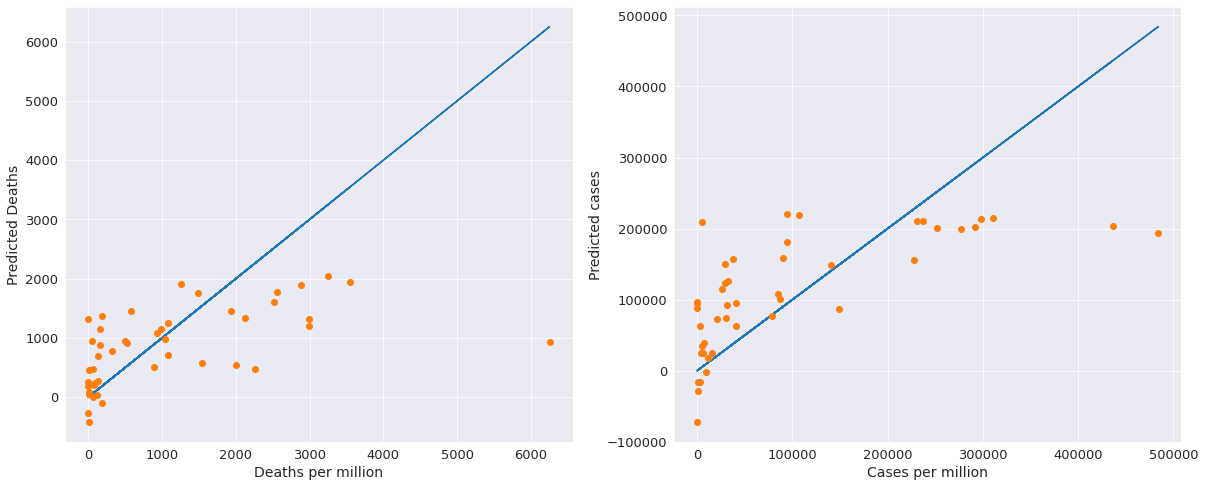

In [809]:
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
plt.xlabel('Deaths per million')
plt.ylabel('Predicted Deaths')
plt.plot(y_test, y_test)
plt.plot(y_test, y_predict, 'o')

plt.subplot(1, 2, 2)
plt.xlabel('Cases per million')
plt.ylabel('Predicted cases')
plt.plot(z_test, z_test)
plt.plot(z_test, z_predict, 'o')

plt.show()

In [813]:
print('Train 1 score:')
print(mlr_model.score(x_train, y_train))
print('\n')
print('Train 2 score:')
print(mlr_model_2.score(x_2_train, z_train))

Train 1 score:
0.36304998679661205


Train 2 score:
0.43857868926665


In [814]:
print('Test 1 score:')
print(mlr_model.score(x_test, y_test))
print('\n')
print('Train 2 score:')
print(mlr_model_2.score(x_2_test, z_test))

Test 1 score:
0.2789625598391341


Train 2 score:
0.4594557130715401


Let's see the coefficients, and how much weighted over the results.

In [810]:
mlr_model.coef_

array([ 81.26003959,  68.36738257,  11.47637102, -32.55867161,
       632.34914979])

In [811]:
mlr_model_2.coef_

array([ 4.24535674e+03, -7.47539153e+03,  5.21911149e+02, -6.73482512e+01,
        3.20859543e+05])

In [816]:
x.columns

Index(['median_age', 'reproduction_rate', 'stringency_index',
       'life_expectancy', 'human_development_index'],
      dtype='object')

For the first model, `stringency_index` and `life_expectancy` were diturbing the prediction.

Let's try to drop them and redo the prediction.

In [819]:
# First group of independent variables
# w - y
w = x.drop(['stringency_index', 'life_expectancy'], axis=1)

In [837]:
w_train, w_test, y_train, y_test = train_test_split(w, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(w_train, y_train)

y_predict= lm.predict(w_test)

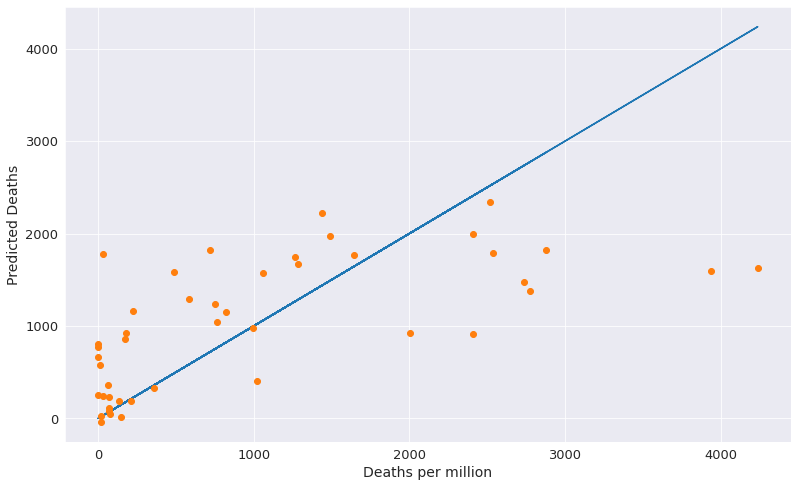

In [838]:
plt.figure(figsize = (13, 8))

plt.xlabel('Deaths per million')
plt.ylabel('Predicted Deaths')
plt.plot(y_test, y_test)
plt.plot(y_test, y_predict, 'o')

plt.show()

In [839]:
print("Train score:")
print(w_model.score(w_train, y_train))

print("Test score:")
print(w_model.score(w_test, y_test))

Train score:
0.2738213037481956
Test score:
0.47076040629750515


Although it is a slighly better model, still the results are insufficient.

The possibile explanations to these findings might be the lack of strong correlations, so the model can't find significant features that have been crucial to the rise of Covid-19 cases/deaths; or, more likely could be a lack of accuracy in the dataset, hypothesys that comes from the work done in filling the NaN values.